<a href="https://colab.research.google.com/github/Naqeebullah11/My-Projects/blob/main/Iris_Dataset_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load and Prepare the Iris Dataset


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 3. Normalize the Data (Important before PCA)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA (2 Components)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Split the Data into Training and Test Sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 6. Train a Decision Tree Classifier


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 7. Make Predictions and Evaluate the Model


In [ ]:
y_pred = dt_model.predict(X_test)



# Accuracy and Classification Report


In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=target_names))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Confusion Matrix as Heatmap


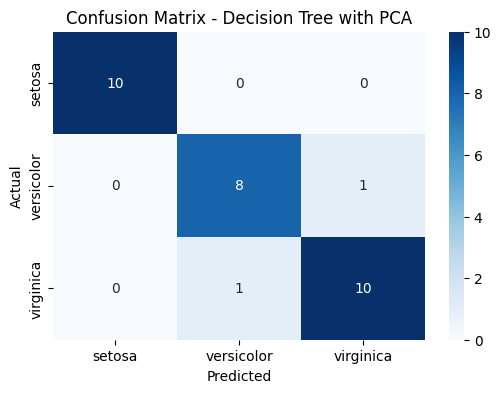

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Decision Tree with PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Plot the PCA 2D Visualization


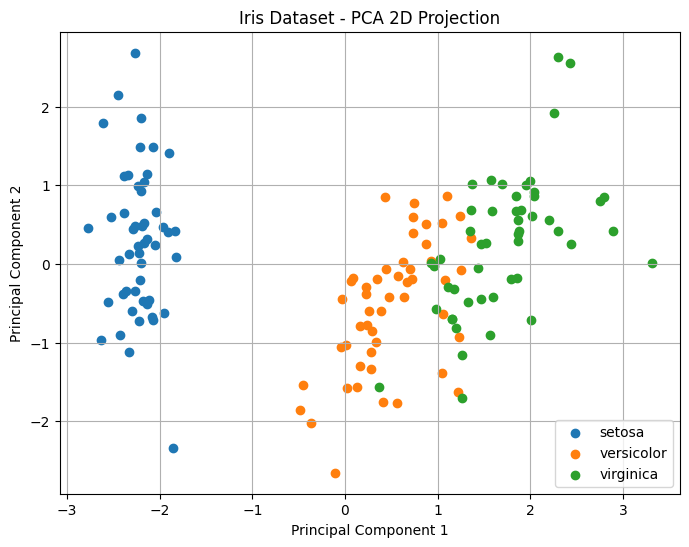

In [ ]:
plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=name)
plt.title("Iris Dataset - PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 9. (Optional) Visualize the Trained Decision Tree

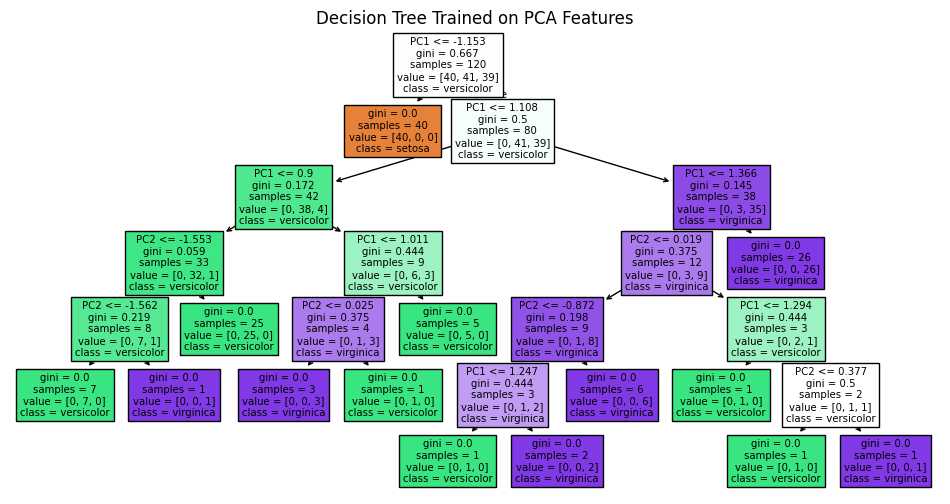

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(dt_model, filled=True, feature_names=["PC1", "PC2"], class_names=target_names)
plt.title("Decision Tree Trained on PCA Features")
plt.show()


# 1. What did you learn about supervised learning and the algorithms you used?
# Answer
I learned that supervised learning uses labeled data to train models so they can make accurate predictions on unseen inputs. This project helped me understand not just how to train models, but also how to evaluate them using metrics like accuracy, precision, recall, F1-score, and confusion matrices. I also saw how feature reduction methods like PCA can simplify models and sometimes improve their performance.

# 2. How did the algorithms compare in terms of performance?
# Answer
The algorithms performed differently depending on the dataset and settings. For example, decision trees were easy to interpret but tended to overfit, while models like logistic regression or ensemble methods provided more stable and balanced results. This comparison showed the trade-offs between interpretability, complexity, and predictive accuracy.

# 3. What challenges did you face, and how did you overcome them?
# Answer
One of the main challenges was dealing with class imbalance, where some models favored the majority class. I overcame this by using evaluation metrics beyond accuracy, such as precision and recall, and by tuning hyperparameters and adjusting class weights. Another challenge was interpreting model results, which I addressed by visualizing confusion matrices and decision tree structures.
